# Import libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 112 kB/s 


In [ ]:
df1=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df=df1

##1.Problem statement

**The LoanTap has to check whether a individual is eligible or not for a personal loan and has to approve based on certain underlying assumptions. Apart from that we need to classify the false positives, false negatives to have maximum profits.** 

##2.Data shape, data types and conversion to categorical

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


**The shape of df is with 3,96,030  rows and 27 columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394275,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48817,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


Among all we can drop issue_d,title,earliest_cr_line,address

In [ ]:
df.drop(['issue_d','sub_grade','home_ownership','earliest_cr_line'],axis=1,inplace=True)

Categorical and numerical columns

In [ ]:
categorical_cols=df.select_dtypes(include='object').columns
categorical_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'verification_status',
       'loan_status', 'purpose', 'title', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
numerical_cols=df.select_dtypes(include='float64').columns
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
for i in  categorical_cols:
  df[i]=df[i].astype('category')

##3.Univariate analysis

###Categorical

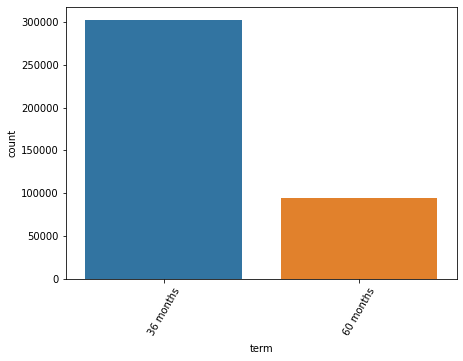

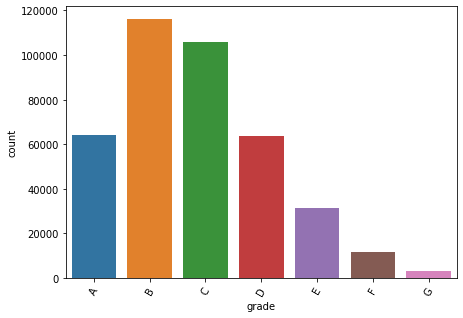

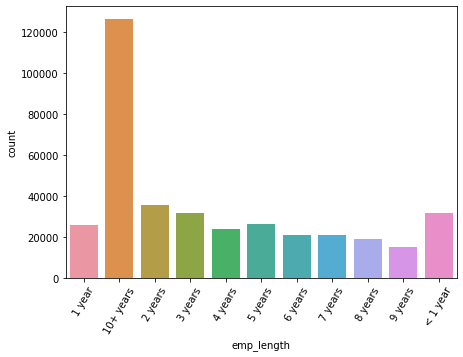

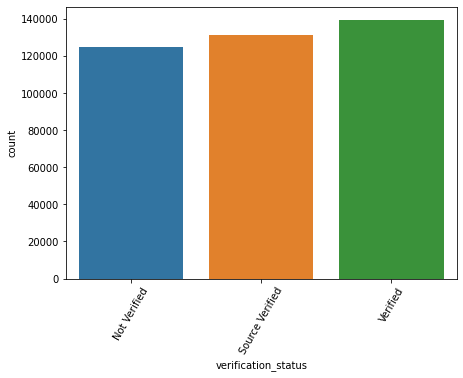

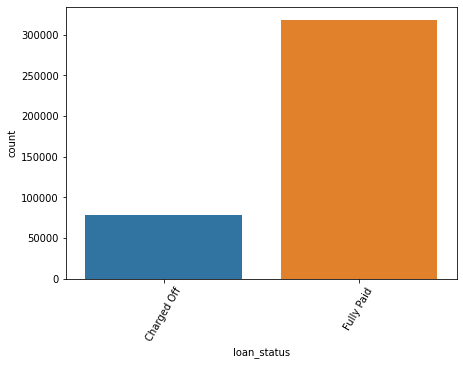

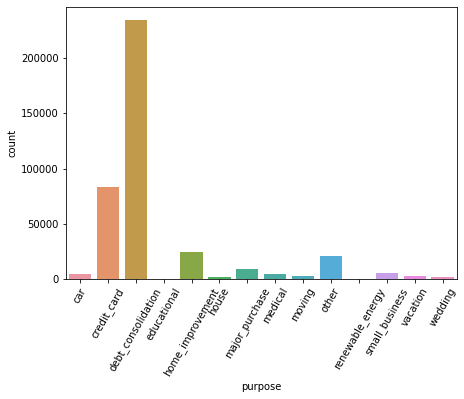

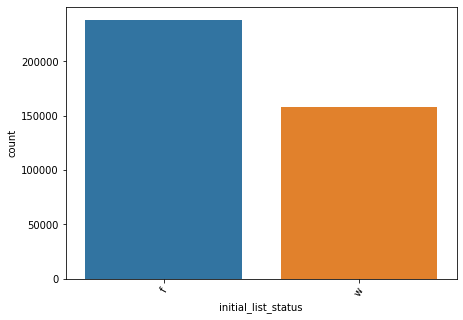

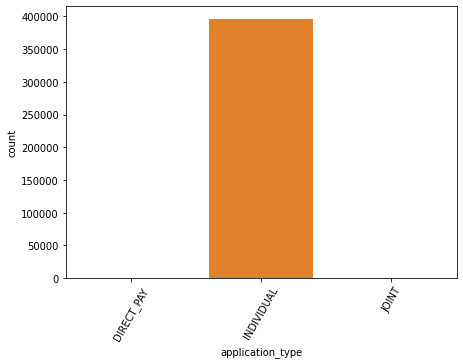

In [ ]:
for i in categorical_cols:
  if df[i].nunique()<20:
    plt.figure(figsize=(7,5))
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=60)
    # plt.ylabel(i)
    plt.show()

In [ ]:
for i in categorical_cols:
  if df[i].nunique()<20:
    print(f'{i}: {df[i].value_counts(normalize=True)}')
    print('______')

term:  36 months    0.762581
 60 months    0.237419
Name: term, dtype: float64
______
grade: B    0.292953
C    0.267624
A    0.162076
D    0.160402
E    0.079509
F    0.029725
G    0.007712
Name: grade, dtype: float64
______
emp_length: 10+ years    0.333681
2 years      0.094848
< 1 year     0.083989
3 years      0.083830
5 years      0.070143
1 year       0.068520
4 years      0.063411
6 years      0.055174
7 years      0.055116
8 years      0.050745
9 years      0.040542
Name: emp_length, dtype: float64
______
verification_status: Verified           0.352405
Source Verified    0.331755
Not Verified       0.315840
Name: verification_status, dtype: float64
______
loan_status: Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64
______
purpose: debt_consolidation    0.592145
credit_card           0.209628
home_improvement      0.060677
other                 0.053493
major_purchase        0.022195
small_business        0.014395
car                   0.01186

Observations and Insights:

1. 36 months term is more than 60 months (ratio is 0.7 : 0.2)
2. B,C,D,A grades are higher in number   (all are considerable ratio except g which is 0.7%)
3. 10+ yrs employees are more who have taken loans (except 10+ all are in same ratio)
4. Mortgage and rent people are higher in number who have taken loans (Other , None, any are very negligeble and we can eliminate those rows)
5. Debt consolidation and credit card are more in  number (renewable and educational are very negligeble and we can eliminate)
6. In initial List status f category is more
7. all are individual loans (joint and direct pay can be eliminated)

In [ ]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [ ]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
df[(df['application_type'].isin(['JOINT','DIRECT_PAY'])) | (df['purpose'].isin(['renewable_energy','educational']))]['loan_status'].value_counts()/(df['loan_status'].value_counts())

Fully Paid     0.00321
Charged Off    0.00354
Name: loan_status, dtype: float64

The above ratio is around 0.3% w.r.t each class. So, even if we remove these rows, the data is not much effected

In [ ]:
df=df[~((df['application_type'].isin(['JOINT','DIRECT_PAY'])) | (df['purpose'].isin(['renewable_energy','educational'])))]

###Numerical

In [ ]:
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

<Figure size 504x360 with 0 Axes>

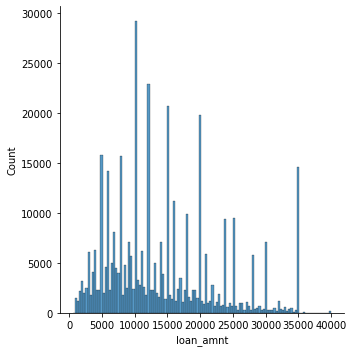

<Figure size 504x360 with 0 Axes>

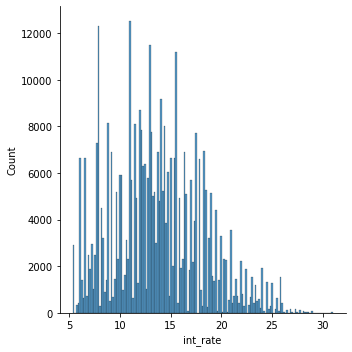

<Figure size 504x360 with 0 Axes>

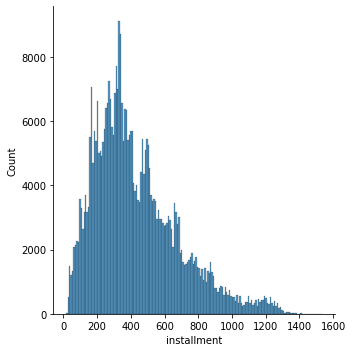

<Figure size 504x360 with 0 Axes>

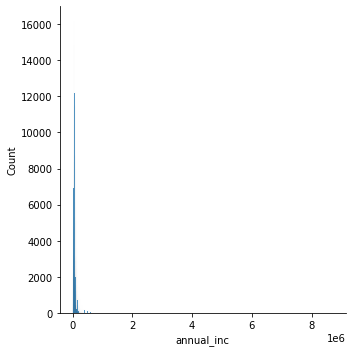

<Figure size 504x360 with 0 Axes>

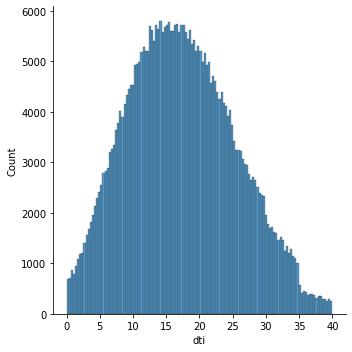

<Figure size 504x360 with 0 Axes>

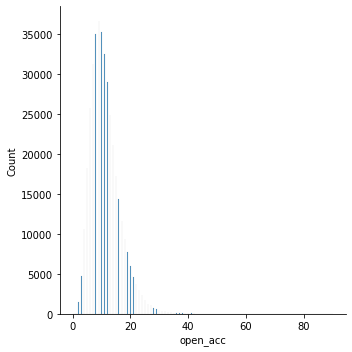

<Figure size 504x360 with 0 Axes>

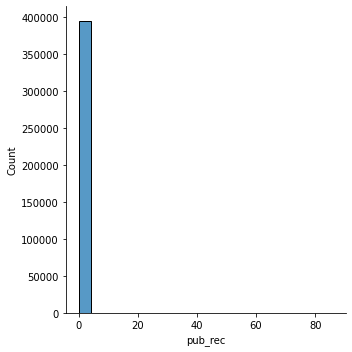

<Figure size 504x360 with 0 Axes>

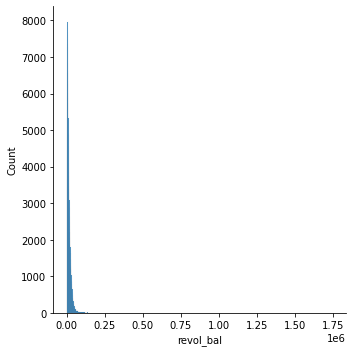

<Figure size 504x360 with 0 Axes>

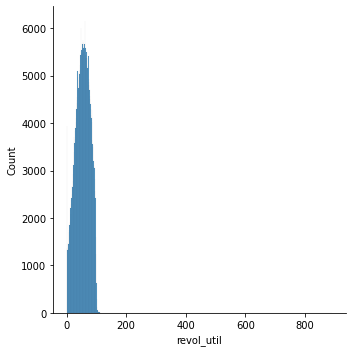

<Figure size 504x360 with 0 Axes>

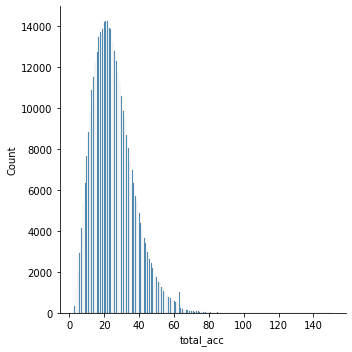

<Figure size 504x360 with 0 Axes>

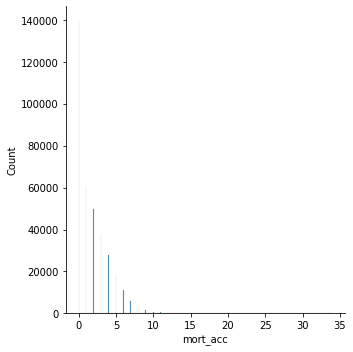

<Figure size 504x360 with 0 Axes>

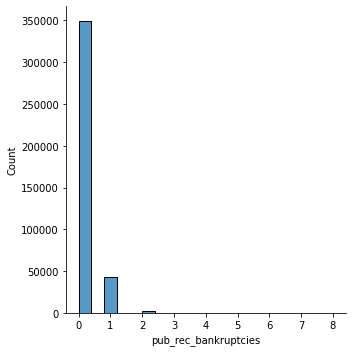

In [ ]:
for i in numerical_cols:
  plt.figure(figsize=(7,5))
  sns.displot(x=i,data=df)
  plt.show()

Observations and Insights:
1. loan amount has no outliers and the distribution is zigzag and not following any uniform or normal.
2. Interest rates of 5 -20 are more in number.
3. installment is folowing right skewed distribution
4. Annual income is having outliers and has to be treated.
5. dti is almost following normal distribution
6. open_acc can be deleted and no proper information much from this feature
7. revolving balance and revolving utilization are having outliers and has to be treated.
8. Total credit lines is right skewed
9. public derogatory records, mortage records, bankrupticies should be treated with either 0 or 1.


In [ ]:
df['annual_inc'].describe()

count    3.947330e+05
mean     7.424620e+04
std      6.167162e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

In [ ]:
df[df['annual_inc']>300000]['loan_status'].value_counts()

Fully Paid     1577
Charged Off     237
Name: loan_status, dtype: int64

These rows can be eliminated to reduce the effect of outliers in our model and for better performance

In [ ]:
df['revol_bal'].describe()

count    3.947330e+05
mean     1.584510e+04
std      2.058888e+04
min      0.000000e+00
25%      6.030000e+03
50%      1.118400e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64

In [ ]:
df[df['revol_bal']>200000]['loan_status'].value_counts()

Fully Paid     606
Charged Off     84
Name: loan_status, dtype: int64

The above rows can be eliminated

In [ ]:
df['revol_util'].describe()

count    394459.000000
mean         53.797681
std          24.444969
min           0.000000
25%          35.900000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

In [ ]:
df[df['revol_util']>200]

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.0,36 months,12.49,117.08,B,Budget Analyst,10+ years,45000.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,14.67,2.0,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


The above rows can be eliminated

In [ ]:
print(df.shape)
df=df[~((df['annual_inc']>300000) | (df['revol_bal']>200000) | (df['revol_util']>200))]
print(df.shape)

(394733, 23)
(392381, 23)


In [ ]:
df=df.drop(['open_acc'],axis=1)

dropping the open_acc

In [ ]:
df['pub_rec'].value_counts()

0.0     335058
1.0      49401
2.0       5420
3.0       1507
4.0        517
5.0        229
6.0        119
7.0         51
8.0         34
9.0         12
10.0        11
11.0         7
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [ ]:
df['mort_acc'].value_counts()

0.0     139161
1.0      59953
2.0      49448
3.0      37612
4.0      27499
5.0      17928
6.0      10888
7.0       5930
8.0       3062
9.0       1616
10.0       841
11.0       468
12.0       255
13.0       141
14.0        99
15.0        58
16.0        34
17.0        20
18.0        16
19.0        13
20.0        12
24.0        10
22.0         6
25.0         4
21.0         3
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

0.0    346970
1.0     42574
2.0      1838
3.0       349
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
def replace_public_mortgage_bankruptcy(x):
  if x<1:
    return 0.0
  elif x>=1:
    return 1.0


In [ ]:
a=['pub_rec','mort_acc','pub_rec_bankruptcies']
for i in a:
  df[i]=df[i].apply(lambda x:replace_public_mortgage_bankruptcy(x))

changed the values greater than 0 to 1

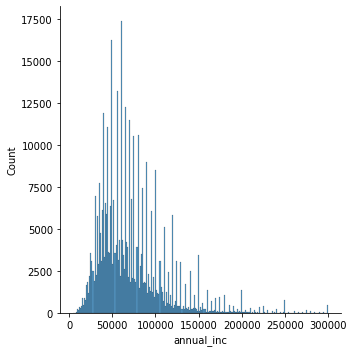

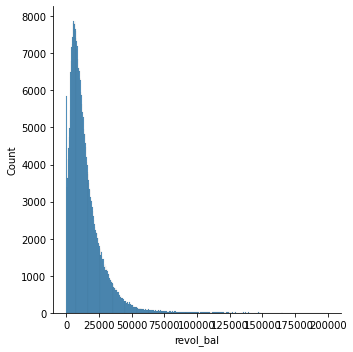

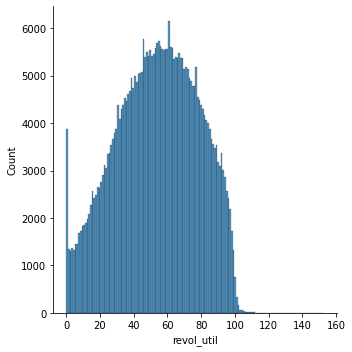

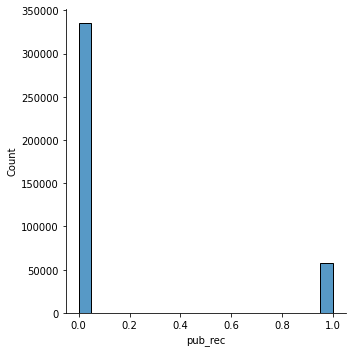

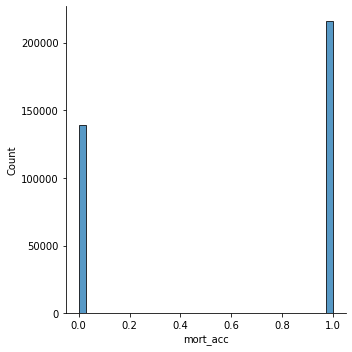

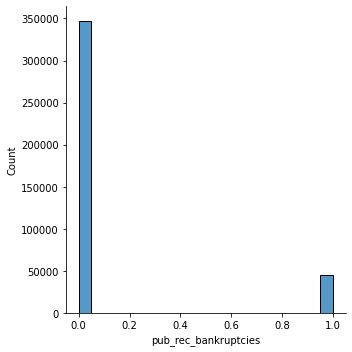

In [ ]:
a=['annual_inc','revol_bal','revol_util','pub_rec','mort_acc','pub_rec_bankruptcies']
for i in a:
  sns.displot(x=i,data=df)
  plt.show()


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392381 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             392381 non-null  float64 
 1   term                  392381 non-null  category
 2   int_rate              392381 non-null  float64 
 3   installment           392381 non-null  float64 
 4   grade                 392381 non-null  category
 5   emp_title             369714 non-null  category
 6   emp_length            374216 non-null  category
 7   annual_inc            392381 non-null  float64 
 8   verification_status   392381 non-null  category
 9   loan_status           392381 non-null  category
 10  purpose               392381 non-null  category
 11  title                 390729 non-null  category
 12  dti                   392381 non-null  float64 
 13  pub_rec               392381 non-null  float64 
 14  revol_bal             392381 non-nul

Actually the columns pub_rec,mort_acc,pub_rec_bankruptcies changed to catgeorical as there are only 2 values. so convert those columns to categorical

In [ ]:
df[['pub_rec','loan_status']].value_counts()

pub_rec  loan_status
0.0      Fully Paid     270199
         Charged Off     64859
1.0      Fully Paid      45086
         Charged Off     12237
dtype: int64

In [ ]:
df[['mort_acc','loan_status']].value_counts()

mort_acc  loan_status
1.0       Fully Paid     177315
0.0       Fully Paid     106148
1.0       Charged Off     38615
0.0       Charged Off     33013
dtype: int64

In [ ]:
df[['pub_rec_bankruptcies','loan_status']].value_counts()

pub_rec_bankruptcies  loan_status
0.0                   Fully Paid     279177
                      Charged Off     67793
1.0                   Fully Paid      35670
                      Charged Off      9218
dtype: int64

In [ ]:
df['pub_rec']=df['pub_rec'].astype('category')
df['mort_acc']=df['mort_acc'].astype('category')
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].astype('category')

##4.Bivariate Analysis

###Categorical and categorical

In [ ]:
categorical_cols=df.select_dtypes(include='category').columns
numerical_cols=df.select_dtypes(include='float64').columns

In [ ]:
categorical_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'verification_status',
       'loan_status', 'purpose', 'title', 'pub_rec', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# df[['grade_target_encoded','loan_status']].value_counts(normalize=True)

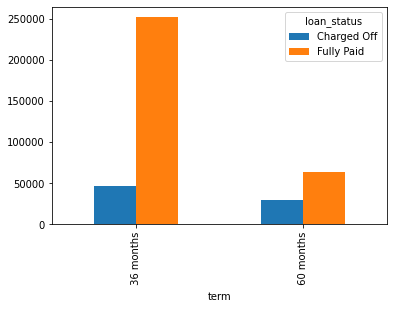

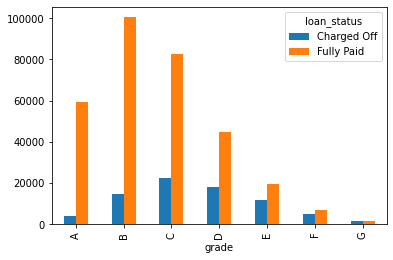

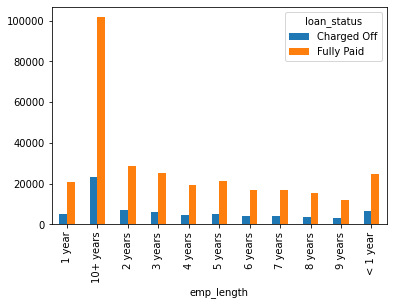

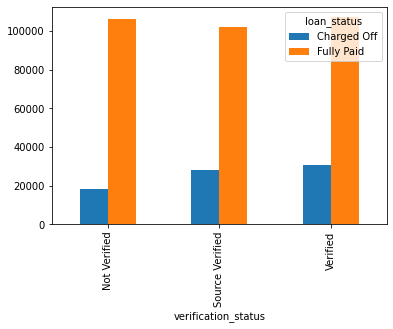

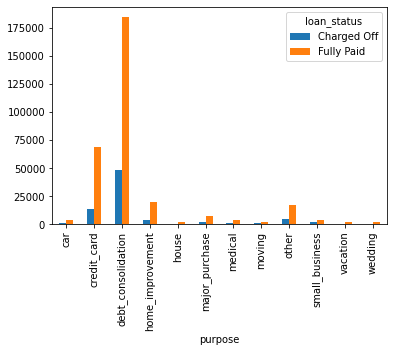

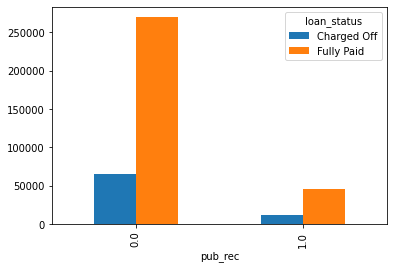

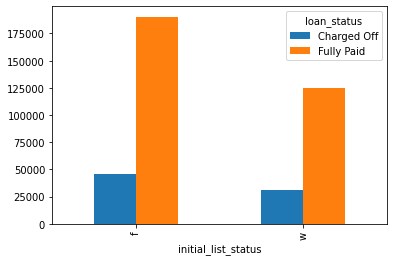

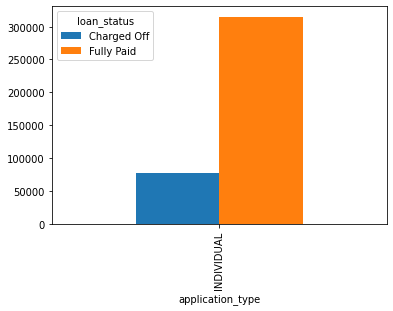

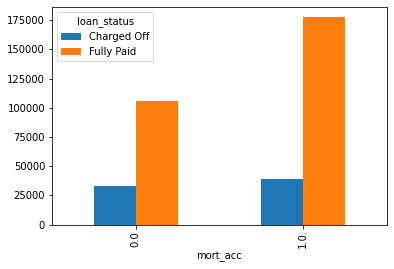

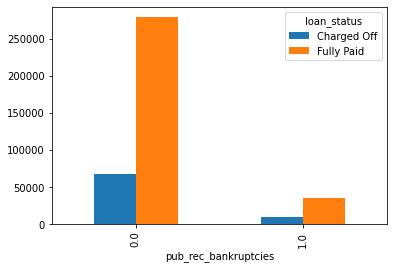

In [ ]:
for i in categorical_cols:
  if i!='loan_status' and df[i].nunique()<20:
    pd.crosstab(df[i],df['loan_status']).plot(kind='bar')
    plt.show()

Observations and Insights:
1. In 36 months have higher full paid and charged off compared to 60 months and there is significant effect from the feature.
2. From grade also we can observe, there is significant effect on full paid or charged off. For C,D if we observe the ratio of fully paid to charged off is slightly higher than other grades.
3. for emp_length only 10+ is higher and seems there is no significant effect on target from this feature as remaining emp_lengths are almost same and no proper distinguishable.
4. for verification status it is almost same and seems no effect.
5. debt consolidation is having higher number of fully paid and charged off.
6. Initial status is also seems same for two categories
7. No need of the application type column
8. In home ownership, the mortgage and rent having high charged off but ratio wise seems same for all categories
9. if pub_rec, pub_rec_bankruptcies are '0' ther are more people who paid fully comapred to charged off where as mort_acc shows inverse relation ship which seems not true or it might be because the debt consolidation is high, the guys who took loan in debt consolidation are having mortgae accounts which means mortgage home ownership

In [ ]:
df[['verification_status','loan_status']].value_counts()

verification_status  loan_status
Verified             Fully Paid     107059
Not Verified         Fully Paid     106261
Source Verified      Fully Paid     101965
Verified             Charged Off     30889
Source Verified      Charged Off     28008
Not Verified         Charged Off     18199
dtype: int64

In [ ]:
df=df.drop(['application_type','verification_status'],axis=1)

### numerical and categorical

In [ ]:
categorical_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'verification_status',
       'loan_status', 'purpose', 'title', 'pub_rec', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

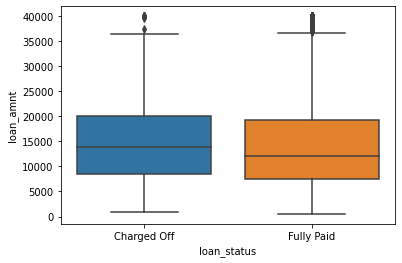

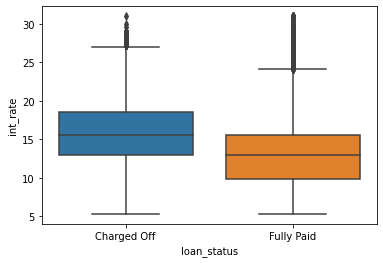

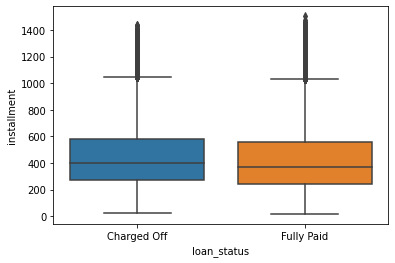

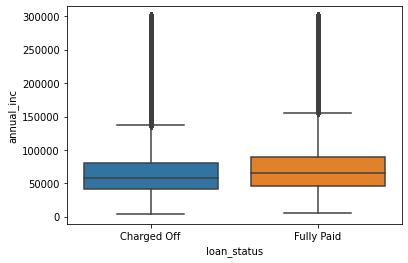

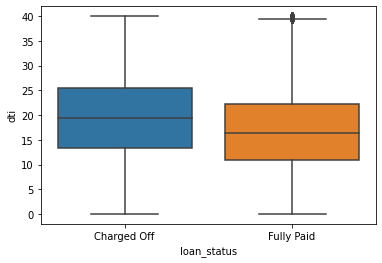

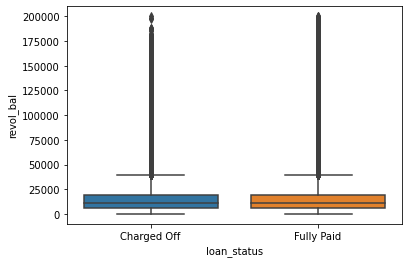

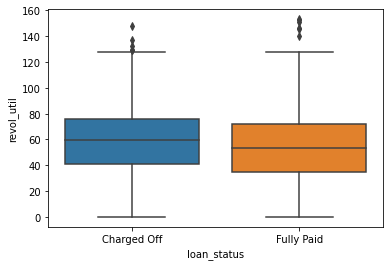

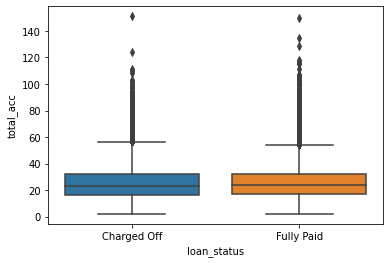

In [ ]:
for i in numerical_cols:
    sns.boxplot(y=i,x='loan_status',data=df)    
    plt.show()

Observations & Insights:
1. charged off chances are more for high loan amount and there is signifficant effect of this feature loan amount on target variable
2. Even if interest rates are more there is chances of charged off
3. Installment is more for charged off compared to fully paid
4. annual income for the fully paid is more than charged off people
5. dti is high for charged off compared to fully paid
6. revolving balance is same but revol utilization is more for charged off compared to fully paid
7. Total_acc is same for charged off and fully paid customers

In [ ]:
df['loan_status'].unique()

['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']

In [ ]:
df['loan_status'].replace('Fully Paid',0,inplace=True)
df['loan_status'].replace('Charged Off',1,inplace=True)

In [ ]:
df['loan_status']=df['loan_status'].astype('float64')

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'annual_inc', 'loan_status', 'purpose', 'title', 'dti',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

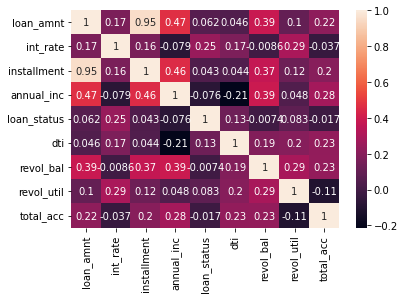

In [ ]:
sns.heatmap(df.corr(),annot=True)

With respect to numerical variables (annual_income - loan_amount), (installment -loan amount), (revol_bal - loan_amnt), (loan_status - int_rate), (int_rate - revol_util), (annual_income - installment), (revol_util - int_rate), (revol_bal - installment), (revol_bal, annual_income), (total_acc- annual_inc), (revol_util - revol_bal) are having higher correlations with each other and w.r.t target variable dti, int_rate are having good correlations

Highly correlation between loan amount and installment. so any on of them should be dropped.

In [ ]:
df=df.drop(['loan_amnt','installment'],axis=1)

In [ ]:
df['annual_inc'].describe()

count    392381.000000
mean      72116.469459
std       39153.066314
min        4000.000000
25%       45000.000000
50%       63500.000000
75%       89448.000000
max      300000.000000
Name: annual_inc, dtype: float64

In [ ]:
df['annual_inc_bins'] = pd.cut(x=df['annual_inc'], bins=[0, 30000, 60000,
                                          120000, 150000,3000000],labels=['very_low', 'low', 'medium',
                            'high', 'very_high'])

In [ ]:
df['annual_inc_bins'].value_counts()

medium       168908
low          157358
very_low      28998
high          20932
very_high     16185
Name: annual_inc_bins, dtype: int64

In [ ]:
df.groupby(['annual_inc_bins'])['loan_status'].value_counts()

annual_inc_bins  loan_status
very_low         0.0             21538
                 1.0              7460
low              0.0            122464
                 1.0             34894
medium           0.0            139471
                 1.0             29437
high             0.0             17903
                 1.0              3029
very_high        0.0             13909
                 1.0              2276
Name: loan_status, dtype: int64

#Data Preprocessing

In [ ]:
df[df.duplicated()]

,term,int_rate,grade,emp_title,emp_length,annual_inc,loan_status,purpose,title,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,annual_inc_bins


**There are no duplicates**

In [ ]:
df.isna().sum()

term                        0
int_rate                    0
grade                       0
emp_title               22667
emp_length              18165
annual_inc                  0
loan_status                 0
purpose                     0
title                    1652
dti                         0
pub_rec                     0
revol_bal                   0
revol_util                269
total_acc                   0
initial_list_status         0
mort_acc                37290
pub_rec_bankruptcies      523
address                     0
annual_inc_bins             0
dtype: int64

In [ ]:
df[df['emp_title'].isna()]['loan_status'].value_counts()/df['loan_status'].value_counts()

0.0    0.053244
1.0    0.076269
Name: loan_status, dtype: float64

In [ ]:
df['emp_title'].nunique()

171919

For nan values in emp_title the charged off accounts to 7% of total charged off candidates. Imputing this categorical variable is also not correct as there are large number of missing values(22658) and the unique values in this feature is also around (~1,71,831). So, better dont consider this feature. Target encoding can be used at extreme cases.

In [ ]:
df[df['emp_length'].isna()]['loan_status'].value_counts()/df['loan_status'].value_counts()

0.0    0.041759
1.0    0.064841
Name: loan_status, dtype: float64

In [ ]:
df['emp_length'].value_counts()

10+ years    124723
2 years       35522
< 1 year      31445
3 years       31366
5 years       26274
1 year        25663
4 years       23723
6 years       20662
7 years       20653
8 years       19016
9 years       15169
Name: emp_length, dtype: int64

Same as emp_title, the missing % of charged is around 6% of total charged off.
better to drop down this feature as well as almost every year total and ratio of charged off to full paid is same except 10+ ( which involves 10,11,12,.......). target encoding can be used at extreme cases.

In [ ]:
df[df['loan_status']==1]['emp_title'].value_counts()

Manager                             924
Teacher                             855
Owner                               448
Supervisor                          402
Sales                               396
                                   ... 
In Balance Ranch Academy              0
In Charge Associate                   0
In Home Care Provider                 0
In Home Care Service                  0
​License Compliance Investigator      0
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df[df['title'].isna()]['loan_status'].value_counts()/df['loan_status'].value_counts()

0.0    0.004272
1.0    0.003956
Name: loan_status, dtype: float64

In [ ]:
df['title'].nunique()

48344

Unique values are more and missing values are more. so instead of impute with mode, better to drop as there wont be much effect on charged off or fully paid

In [ ]:
df=df.drop(['title'],axis=1)

In [ ]:
df[df['revol_util'].isna()]['loan_status'].value_counts()/df['loan_status'].value_counts()

0.0    0.000657
1.0    0.000804
Name: loan_status, dtype: float64

In [ ]:
df['revol_util'].value_counts()

0.00      2158
53.00      740
60.00      733
61.00      730
55.00      724
          ... 
123.00       1
49.63        1
0.49         1
8.46         1
128.10       1
Name: revol_util, Length: 1223, dtype: int64

We can impute values using mean or mode or kNN imputer

In [ ]:
df[df['mort_acc'].isna()]['loan_status'].value_counts()/df['loan_status'].value_counts()

0.0    0.100931
1.0    0.070925
Name: loan_status, dtype: float64

For this also, we can use target imputation or mode

In [ ]:
df[df['pub_rec_bankruptcies'].isna()]['loan_status'].value_counts()/df['loan_status'].value_counts()

0.0    0.001389
1.0    0.001103
Name: loan_status, dtype: float64

as missing data is less we can use kNN imputation or mode

Convert all column values to numericals

##Categorical Encoding

In [ ]:
df.columns

Index(['term', 'int_rate', 'grade', 'emp_title', 'emp_length', 'annual_inc',
       'loan_status', 'purpose', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'annual_inc_bins'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392381 entries, 0 to 396029
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   term                  392381 non-null  category
 1   int_rate              392381 non-null  float64 
 2   grade                 392381 non-null  category
 3   emp_title             369714 non-null  category
 4   emp_length            374216 non-null  category
 5   annual_inc            392381 non-null  float64 
 6   loan_status           392381 non-null  float64 
 7   purpose               392381 non-null  category
 8   dti                   392381 non-null  float64 
 9   pub_rec               392381 non-null  category
 10  revol_bal             392381 non-null  float64 
 11  revol_util            392112 non-null  float64 
 12  total_acc             392381 non-null  float64 
 13  initial_list_status   392381 non-null  category
 14  mort_acc              355091 non-nul

In [ ]:
categorical_cols=df.select_dtypes('category').columns
numerical_cols=df.select_dtypes('float64').columns

In [ ]:
categorical_cols,numerical_cols

(Index(['term', 'grade', 'emp_title', 'emp_length', 'purpose', 'pub_rec',
        'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'address',
        'annual_inc_bins'],
       dtype='object'),
 Index(['int_rate', 'annual_inc', 'loan_status', 'dti', 'revol_bal',
        'revol_util', 'total_acc'],
       dtype='object'))

1. Term is label encoding as there are only 2 categories
2. Grade is around 7 categories so one hot encoding and there is no specific order or target encoding
3. sub_grade probably target encoding or drop
4. emp_title target encoding
5. emp_length one hot encoding or target encoding
6. home ownership one hot encoding or target encoding
7. purpose one hot encoding or target encoding
8. pub_rec label encoding
9. initial list status label encoding
10. mort_acc label encoding
11. pub_rec_bankruptcies label encoding


Due to multicollinearity and high dimensionality its better to use target encoding.

In [ ]:
# df['emp_title_knn']=imputer.fit_transform(df['emp_title'])

In [ ]:
# target_encoders_cols=['grade', 'sub_grade', 'emp_title', 'emp_length','purpose']

In [ ]:
df['address_pincode']=df['address'].apply(lambda x: x.strip().split(" ")[-1])

In [ ]:
df['address_pincode'].unique()

array(['22690', '05113', '00813', '11650', '30723', '29597', '70466',
       '48052', '86630', '93700'], dtype=object)

In [ ]:
df['address_pincode'].value_counts()

70466    56466
30723    56050
22690    56020
48052    55416
00813    45335
29597    45034
05113    44972
11650    11135
93700    11060
86630    10893
Name: address_pincode, dtype: int64

In [ ]:
df.groupby(['address_pincode'])['loan_status'].value_counts(normalize=True)

address_pincode  loan_status
00813            0.0            1.000000
05113            0.0            1.000000
11650            1.0            1.000000
22690            0.0            0.805980
                 1.0            0.194020
29597            0.0            1.000000
30723            0.0            0.804567
                 1.0            0.195433
48052            0.0            0.799444
                 1.0            0.200556
70466            0.0            0.803935
                 1.0            0.196065
86630            1.0            1.000000
93700            1.0            1.000000
Name: loan_status, dtype: float64

In [ ]:
target_encoders_cols=['grade', 'address_pincode','emp_length','purpose']

In [ ]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [ ]:
for i in target_encoders_cols:
  df[i+'_target_encoded']=encoder.fit_transform(df[i],df['loan_status'])

In [ ]:
df=df.drop(target_encoders_cols,axis=1)

In [ ]:
df[[i+'_target_encoded' for i in target_encoders_cols]]

,grade_target_encoded,address_pincode_target_encoded,emp_length_target_encoded,purpose_target_encoded
0,0.125789,0.194020,0.184818,0.189344
1,0.125789,0.000000,0.192303,0.207738
2,0.125789,0.000000,0.207346,0.167375
3,0.063078,0.000000,0.189478,0.167375
4,0.212277,1.000000,0.201266,0.167375
...,...,...,...,...
396025,0.125789,0.195433,0.193232,0.207738
396026,0.212277,0.000000,0.192586,0.207738
396027,0.125789,0.196065,0.184818,0.207738
396028,0.212277,0.000000,0.184818,0.207738


In [ ]:
label_encoders_cols=['term', 'pub_rec', 'initial_list_status','mort_acc', 'pub_rec_bankruptcies']

In [ ]:
for i in label_encoders_cols:
  print(df[i].isna().sum())

0
0
0
37290
523


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in label_encoders_cols:
  df[i+'_label_encoded']=le.fit_transform(df[i])

In [ ]:
df['mort_acc'].isna().sum(),df['mort_acc_label_encoded'].isna().sum()

(37290, 0)

In [ ]:
df[df['mort_acc'].isna()].iloc[0]['mort_acc_label_encoded']

2

In [ ]:
df[df['mort_acc_label_encoded']==2]

,term,int_rate,emp_title,annual_inc,loan_status,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,annual_inc_bins,grade_target_encoded,address_pincode_target_encoded,emp_length_target_encoded,purpose_target_encoded,term_label_encoded,pub_rec_label_encoded,initial_list_status_label_encoded,mort_acc_label_encoded,pub_rec_bankruptcies_label_encoded
22,36 months,6.99,midstate steel llc,24000.0,0.0,4.80,0.0,0.0,0.0,7.0,f,NaN,0.0,"54395 Melissa Walks\r\nJenniferbury, AL 05113",very_low,0.063078,0.000000,0.192586,0.212534,0,0,0,2,0
25,36 months,11.36,CSU Monterey Bay,46680.0,1.0,6.56,0.0,4370.0,40.1,10.0,f,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,...",low,0.125789,0.195433,0.193232,0.217579,0,0,0,2,0
32,36 months,6.03,American Heart Association,64000.0,0.0,3.81,0.0,4912.0,13.4,18.0,f,NaN,0.0,"2722 Smith Branch Suite 131\r\nShaunbury, NH 2...",medium,0.063078,0.194020,0.199431,0.167375,0,0,0,2,0
41,60 months,19.91,American Airlines,52000.0,1.0,20.70,0.0,29178.0,87.6,16.0,f,NaN,0.0,"5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ...",low,0.374811,0.194020,0.184818,0.207738,1,0,0,2,0
62,36 months,10.39,self,66000.0,0.0,1.56,0.0,15807.0,20.0,17.0,f,NaN,0.0,USS Goodman\r\nFPO AE 22690,medium,0.125789,0.194020,0.184818,0.217579,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,36 months,9.63,Bank of New York Mellon,54000.0,0.0,6.84,0.0,2776.0,33.0,21.0,f,NaN,0.0,USNS Brewer\r\nFPO AA 29597,low,0.125789,0.000000,0.192303,0.167375,0,0,0,2,0
395995,36 months,10.25,The NPD Group,55000.0,0.0,18.59,0.0,5571.0,42.2,20.0,f,NaN,0.0,"PSC 0897, Box 0320\r\nAPO AP 22690",low,0.125789,0.194020,0.195116,0.171321,0,0,0,2,0
396016,36 months,5.42,Saint Paul Public Schools,70000.0,0.0,13.94,0.0,4062.0,12.6,23.0,f,NaN,0.0,"2672 Jennifer River\r\nJoannemouth, AK 70466",medium,0.063078,0.196065,0.184818,0.164545,0,0,0,2,0
396021,36 months,5.42,St Francis Medical Center,33000.0,0.0,21.45,0.0,3985.0,7.6,50.0,f,NaN,0.0,"309 John Mission\r\nWest Marc, NY 00813",low,0.063078,0.000000,0.184818,0.207738,0,0,0,2,0


In [ ]:
df['mort_acc_label_encoded'].replace({2:np.nan},inplace=True)

In [ ]:
df['mort_acc'].isna().sum(),df['mort_acc_label_encoded'].isna().sum()

(37290, 37290)

In [ ]:
df[df['mort_acc'].isna()]['loan_status'].value_counts()

0.0    31822
1.0     5468
Name: loan_status, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].isna().sum(),df['pub_rec_bankruptcies_label_encoded'].isna().sum()

(523, 0)

In [ ]:
df[df['pub_rec_bankruptcies'].isna()].iloc[0]['pub_rec_bankruptcies_label_encoded']

2

In [ ]:
df[df['pub_rec_bankruptcies_label_encoded']==2]

,term,int_rate,emp_title,annual_inc,loan_status,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,annual_inc_bins,grade_target_encoded,address_pincode_target_encoded,emp_length_target_encoded,purpose_target_encoded,term_label_encoded,pub_rec_label_encoded,initial_list_status_label_encoded,mort_acc_label_encoded,pub_rec_bankruptcies_label_encoded
912,36 months,9.45,The Sagemont School,40000.0,0.0,5.97,0.0,3212.0,35.7,18.0,f,NaN,NaN,Unit 7803 Box 8673\r\nDPO AA 22690,low,0.125789,0.194020,0.195116,0.167375,0,0,0,NaN,2
1236,36 months,8.07,Affinity Marketing Group,90000.0,0.0,2.44,0.0,40384.0,9.6,25.0,f,NaN,NaN,"PSC 6601, Box 3923\r\nAPO AA 48052",medium,0.063078,0.200556,0.193232,0.212534,0,0,0,NaN,2
3314,36 months,8.63,Network One,57000.0,0.0,0.32,0.0,167.0,3.3,4.0,f,NaN,NaN,"201 Diaz Garden\r\nSouth Peter, GA 00813",low,0.063078,0.000000,0.192303,0.171321,0,0,0,NaN,2
3767,36 months,7.43,Rail Europe Group,200000.0,0.0,0.28,0.0,3164.0,13.7,2.0,f,NaN,NaN,062 Hunter Freeway Apt. 026\r\nNorth Laurenfor...,very_high,0.063078,0.195433,0.192303,0.199172,0,0,0,NaN,2
5821,36 months,9.76,Kaulkin Ginsberg,63000.0,0.0,2.70,0.0,4010.0,8.1,17.0,f,NaN,NaN,"PSC 2418, Box 7919\r\nAPO AE 48052",medium,0.125789,0.200556,0.207346,0.294662,0,0,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393931,36 months,10.14,Affiliated Computer Services,44000.0,0.0,9.79,0.0,0.0,0.0,20.0,f,NaN,NaN,"8293 Henry Forges\r\nAngelamouth, LA 70466",low,0.125789,0.196065,0.199431,0.212534,0,0,0,NaN,2
394290,36 months,12.92,Ledesma Studio Ltd.,70000.0,0.0,4.08,0.0,1152.0,13.1,39.0,f,NaN,NaN,"82661 Moses Views Apt. 771\r\nKatieborough, KY...",medium,0.289481,0.000000,0.184818,0.207738,0,0,0,NaN,2
394292,36 months,9.33,Fannie Mae,112000.0,1.0,13.46,1.0,27786.0,85.5,16.0,f,NaN,NaN,"049 Sheri Neck Apt. 051\r\nMichaeltown, NC 30723",medium,0.125789,0.195433,0.192303,0.212534,0,1,0,NaN,2
395028,36 months,12.17,Equality Florida,70000.0,1.0,10.20,0.0,26283.0,39.5,20.0,f,NaN,NaN,"6682 Ethan Center\r\nStephenston, AZ 93700",medium,0.289481,1.000000,0.201266,0.167375,0,0,0,NaN,2


In [ ]:
df['pub_rec_bankruptcies_label_encoded'].replace({2:np.nan},inplace=True)

In [ ]:
df['pub_rec_bankruptcies'].isna().sum(),df['pub_rec_bankruptcies_label_encoded'].isna().sum()

(523, 523)

In [ ]:
df=df.drop(label_encoders_cols,axis=1)

In [ ]:
df[[i+'_label_encoded' for i in label_encoders_cols]]

,term_label_encoded,pub_rec_label_encoded,initial_list_status_label_encoded,mort_acc_label_encoded,pub_rec_bankruptcies_label_encoded
0,0,0,1,0.0,0.0
1,0,0,0,1.0,0.0
2,0,0,0,0.0,0.0
3,0,0,0,0.0,0.0
4,1,0,0,1.0,0.0
...,...,...,...,...,...
396025,1,0,1,0.0,0.0
396026,0,0,0,1.0,0.0
396027,0,0,0,0.0,0.0
396028,1,0,0,1.0,0.0


In [ ]:
df=df.drop(['mort_acc_label_encoded'],axis=1)

In [ ]:
categorical_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'purpose', 'pub_rec',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'annual_inc_bins'],
      dtype='object')

In [ ]:
label_encoders_cols,target_encoders_cols

(['term',
  'pub_rec',
  'initial_list_status',
  'mort_acc',
  'pub_rec_bankruptcies'],
 ['grade', 'address_pincode', 'emp_length', 'purpose'])

In [ ]:
df.columns

Index(['int_rate', 'emp_title', 'annual_inc', 'loan_status', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'address', 'annual_inc_bins',
       'grade_target_encoded', 'address_pincode_target_encoded',
       'emp_length_target_encoded', 'purpose_target_encoded',
       'term_label_encoded', 'pub_rec_label_encoded',
       'initial_list_status_label_encoded',
       'pub_rec_bankruptcies_label_encoded'],
      dtype='object')

In [ ]:
df[df['emp_title'].isna()]['loan_status'].value_counts()

0.0    16787
1.0     5880
Name: loan_status, dtype: int64

In [ ]:
df[df['loan_status']==0]['emp_title'].value_counts()

Teacher                   3510
Manager                   3296
Registered Nurse          1468
RN                        1459
Supervisor                1419
                          ... 
CONTACT REPRESENTATIVE       0
Greeter                      0
Saales Associate             0
CONTRACT ADMINISTRATOR       0
Midco Diving & Marine        0
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df[df['loan_status']==1]['emp_title'].value_counts()

Manager                             924
Teacher                             855
Owner                               448
Supervisor                          402
Sales                               396
                                   ... 
In Balance Ranch Academy              0
In Charge Associate                   0
In Home Care Provider                 0
In Home Care Service                  0
​License Compliance Investigator      0
Name: emp_title, Length: 173105, dtype: int64

##Do Target imputation

In [ ]:
df['emp_title_target_encoded']=encoder.fit_transform(df['emp_title'],df['loan_status'])

In [ ]:
# df['emp_title_target_encoded'].isna().sum()

In [ ]:
df=df.drop(['emp_title'],axis=1)

In [ ]:
df=df.drop(['address'],axis=1)

In [ ]:
df

,int_rate,annual_inc,loan_status,dti,revol_bal,revol_util,total_acc,annual_inc_bins,grade_target_encoded,address_pincode_target_encoded,emp_length_target_encoded,purpose_target_encoded,term_label_encoded,pub_rec_label_encoded,initial_list_status_label_encoded,pub_rec_bankruptcies_label_encoded,emp_title_target_encoded
0,11.44,117000.0,0.0,26.24,36369.0,41.8,25.0,medium,0.125789,0.194020,0.184818,0.189344,0,0,1,0.0,0.241379
1,11.99,65000.0,0.0,22.05,20131.0,53.3,27.0,medium,0.125789,0.000000,0.192303,0.207738,0,0,0,0.0,0.317020
2,10.49,43057.0,0.0,12.79,11987.0,92.2,26.0,low,0.125789,0.000000,0.207346,0.167375,0,0,0,0.0,0.181819
3,6.49,54000.0,0.0,2.60,5472.0,21.5,13.0,low,0.063078,0.000000,0.189478,0.167375,0,0,0,0.0,0.196483
4,17.27,55000.0,1.0,33.95,24584.0,69.8,43.0,low,0.212277,1.000000,0.201266,0.167375,1,0,0,0.0,0.196483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10.99,40000.0,0.0,15.63,1990.0,34.3,23.0,low,0.125789,0.195433,0.193232,0.207738,1,0,1,0.0,0.196483
396026,12.29,110000.0,0.0,21.45,43263.0,95.7,8.0,medium,0.212277,0.000000,0.192586,0.207738,0,0,0,0.0,0.208791
396027,9.99,56500.0,0.0,17.56,32704.0,66.9,23.0,low,0.125789,0.196065,0.184818,0.207738,0,0,0,0.0,0.268657
396028,15.31,64000.0,0.0,15.88,15704.0,53.8,20.0,medium,0.212277,0.000000,0.184818,0.207738,1,0,0,0.0,0.196483


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['very_low','low','medium','high','very_high']])
df[['annual_inc_bins']]=enc.fit_transform(df[['annual_inc_bins']])

In [ ]:
# df.groupby(['annual_inc_bins'])['annual_inc_bins_1'].value_counts()

In [ ]:
# df=df.drop(['annual_inc_bins_1'],axis=1)

In [ ]:
df[df.columns]

,int_rate,annual_inc,loan_status,dti,revol_bal,revol_util,total_acc,annual_inc_bins,grade_target_encoded,address_pincode_target_encoded,emp_length_target_encoded,purpose_target_encoded,term_label_encoded,pub_rec_label_encoded,initial_list_status_label_encoded,pub_rec_bankruptcies_label_encoded,emp_title_target_encoded
0,11.44,117000.0,0.0,26.24,36369.0,41.8,25.0,2.0,0.125789,0.194020,0.184818,0.189344,0,0,1,0.0,0.241379
1,11.99,65000.0,0.0,22.05,20131.0,53.3,27.0,2.0,0.125789,0.000000,0.192303,0.207738,0,0,0,0.0,0.317020
2,10.49,43057.0,0.0,12.79,11987.0,92.2,26.0,1.0,0.125789,0.000000,0.207346,0.167375,0,0,0,0.0,0.181819
3,6.49,54000.0,0.0,2.60,5472.0,21.5,13.0,1.0,0.063078,0.000000,0.189478,0.167375,0,0,0,0.0,0.196483
4,17.27,55000.0,1.0,33.95,24584.0,69.8,43.0,1.0,0.212277,1.000000,0.201266,0.167375,1,0,0,0.0,0.196483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10.99,40000.0,0.0,15.63,1990.0,34.3,23.0,1.0,0.125789,0.195433,0.193232,0.207738,1,0,1,0.0,0.196483
396026,12.29,110000.0,0.0,21.45,43263.0,95.7,8.0,2.0,0.212277,0.000000,0.192586,0.207738,0,0,0,0.0,0.208791
396027,9.99,56500.0,0.0,17.56,32704.0,66.9,23.0,1.0,0.125789,0.196065,0.184818,0.207738,0,0,0,0.0,0.268657
396028,15.31,64000.0,0.0,15.88,15704.0,53.8,20.0,2.0,0.212277,0.000000,0.184818,0.207738,1,0,0,0.0,0.196483


In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=4,weights='distance')

In [ ]:
df['revol_util'].mean()

53.785856821520404

In [ ]:
df['revol_util'].fillna(df['revol_util'].mean(),inplace=True)

In [ ]:
# df['mort_acc_label_encoded'].value_counts()

In [ ]:
df['pub_rec_label_encoded'].value_counts()

0    335058
1     57323
Name: pub_rec_label_encoded, dtype: int64

In [ ]:
# df['mort_acc_label_encoded'].fillna(df['mort_acc_label_encoded'].mode()[0],inplace=True)

In [ ]:
df['pub_rec_bankruptcies_label_encoded'].fillna(df['pub_rec_bankruptcies_label_encoded'].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

int_rate                              0
annual_inc                            0
loan_status                           0
dti                                   0
revol_bal                             0
revol_util                            0
total_acc                             0
annual_inc_bins                       0
grade_target_encoded                  0
address_pincode_target_encoded        0
emp_length_target_encoded             0
purpose_target_encoded                0
term_label_encoded                    0
pub_rec_label_encoded                 0
initial_list_status_label_encoded     0
pub_rec_bankruptcies_label_encoded    0
emp_title_target_encoded              0
dtype: int64

In [ ]:
df=df.drop(['initial_list_status_label_encoded','annual_inc','int_rate'],axis=1)

There are no outliers

X & Y separation

In [ ]:
X = df[df.columns.drop('loan_status')]
Y = df["loan_status"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train,X_test

(          dti  revol_bal  revol_util  total_acc  annual_inc_bins  \
 17434   24.08    10392.0        35.6       43.0              2.0   
 157570  15.13    38107.0        69.9       26.0              4.0   
 388275  19.11    30512.0        63.3       25.0              2.0   
 25553   15.69     8126.0        65.0       16.0              1.0   
 383899  14.67     5656.0        68.0        8.0              1.0   
 ...       ...        ...         ...        ...              ...   
 74014   18.35    14120.0        83.1       17.0              1.0   
 374874  24.00    11258.0        60.5       16.0              1.0   
 315096   5.83    19910.0        23.4       28.0              4.0   
 269805  28.82    38062.0        68.8       32.0              2.0   
 129197  18.00    19627.0        43.5       27.0              2.0   
 
         grade_target_encoded  address_pincode_target_encoded  \
 17434               0.289481                        0.194020   
 157570              0.125789           

In [ ]:
Y_train,Y_test

(17434     0.0
 157570    0.0
 388275    0.0
 25553     0.0
 383899    0.0
          ... 
 74014     0.0
 374874    0.0
 315096    0.0
 269805    1.0
 129197    0.0
 Name: loan_status, Length: 313904, dtype: float64, 174305    0.0
 62704     0.0
 114358    0.0
 161829    0.0
 305632    0.0
          ... 
 215546    0.0
 332358    0.0
 54398     0.0
 391417    0.0
 62682     0.0
 Name: loan_status, Length: 78477, dtype: float64)

In [ ]:
X_train

,dti,revol_bal,revol_util,total_acc,annual_inc_bins,grade_target_encoded,address_pincode_target_encoded,emp_length_target_encoded,purpose_target_encoded,term_label_encoded,pub_rec_label_encoded,pub_rec_bankruptcies_label_encoded,emp_title_target_encoded
17434,24.08,10392.0,35.6,43.0,2.0,0.289481,0.194020,0.189478,0.207738,0,0,0.0,0.121951
157570,15.13,38107.0,69.9,26.0,4.0,0.125789,0.196065,0.195116,0.207738,0,0,0.0,0.196483
388275,19.11,30512.0,63.3,25.0,2.0,0.063078,0.000000,0.184818,0.207738,0,0,0.0,0.003534
25553,15.69,8126.0,65.0,16.0,1.0,0.289481,0.000000,0.199431,0.167375,0,0,0.0,0.196483
383899,14.67,5656.0,68.0,8.0,1.0,0.212277,0.000000,0.193232,0.167375,0,0,0.0,0.196483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74014,18.35,14120.0,83.1,17.0,1.0,0.212277,0.000000,0.199431,0.167375,0,0,0.0,0.196483
374874,24.00,11258.0,60.5,16.0,1.0,0.212277,0.000000,0.193232,0.207738,0,1,1.0,0.003534
315096,5.83,19910.0,23.4,28.0,4.0,0.063078,0.000000,0.199431,0.207738,0,0,0.0,0.196483
269805,28.82,38062.0,68.8,32.0,2.0,0.289481,0.194020,0.184818,0.167375,0,0,0.0,0.098039


In [ ]:
X_train.isna().sum()

dti                                   0
revol_bal                             0
revol_util                            0
total_acc                             0
annual_inc_bins                       0
grade_target_encoded                  0
address_pincode_target_encoded        0
emp_length_target_encoded             0
purpose_target_encoded                0
term_label_encoded                    0
pub_rec_label_encoded                 0
pub_rec_bankruptcies_label_encoded    0
emp_title_target_encoded              0
dtype: int64

In [ ]:
X_train.describe()

,dti,revol_bal,revol_util,total_acc,annual_inc_bins,grade_target_encoded,address_pincode_target_encoded,emp_length_target_encoded,purpose_target_encoded,term_label_encoded,pub_rec_label_encoded,pub_rec_bankruptcies_label_encoded,emp_title_target_encoded
count,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,313904.000000,3.139040e+05
mean,17.356616,15243.203508,53.772733,25.396178,1.588451,0.196532,0.196553,0.196485,0.196514,0.237006,0.146233,0.114583,2.005082e-01
std,8.073146,15470.519701,24.370092,11.881518,0.863131,0.102689,0.260175,0.018649,0.023555,0.425246,0.353340,0.318518,1.010043e-01
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.063078,0.000000,0.184818,0.120489,0.000000,0.000000,0.000000,3.693100e-13
25%,11.330000,6013.000000,35.900000,17.000000,1.000000,0.125789,0.000000,0.184818,0.171321,0.000000,0.000000,0.000000,1.706349e-01
50%,16.930000,11132.000000,54.800000,24.000000,2.000000,0.212277,0.195433,0.193232,0.207738,0.000000,0.000000,0.000000,1.964825e-01
75%,22.980000,19492.000000,72.800000,32.000000,2.000000,0.289481,0.196065,0.199431,0.207738,0.000000,0.000000,0.000000,2.312500e-01
max,39.990000,200000.000000,153.000000,151.000000,4.000000,0.478101,1.000000,0.275200,0.294662,1.000000,1.000000,1.000000,9.946222e-01


##Model Building

In [ ]:
df['loan_status'].value_counts()

0.0    315285
1.0     77096
Name: loan_status, dtype: int64

In [ ]:
315285/77096

4.089511777524126

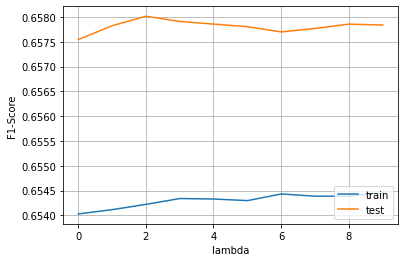

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
test_scores = []
scaler = StandardScaler()
l = 0.01
h = 10
d = 1

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:1, 1:4 }))
  scaled_lr.fit(X_train, Y_train)
  train_y_pred = scaled_lr.predict(X_train)
  test_y_pred = scaled_lr.predict(X_test)
  train_score = f1_score(Y_train, train_y_pred)
  test_score = f1_score(Y_test, test_y_pred)
  train_scores.append(train_score)
  test_scores.append(test_score)

#plotting
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [ ]:
best_idx = np.argmax(test_scores)
print(test_scores[best_idx])

0.6580164371977484


In [ ]:
# Model with lambda_best
best_idx = np.argmax(test_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:1, 1:4 }))
scaled_lr.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.49751243781094534,
                                    class_weight={0: 1, 1: 4}))])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(Y_test, scaled_lr.predict(X_test))
print(conf_mat)

[[53086  9941]
 [ 3000 12450]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score , f1_score, plot_confusion_matrix,classification_report

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

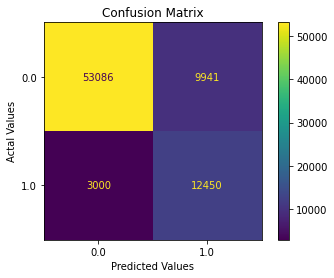

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(scaled_lr,X_test,Y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
f1_score(Y_test,scaled_lr.predict(X_test))

0.6580164371977484

In [ ]:
accuracy_score(Y_test,scaled_lr.predict(X_test))

0.8350981816328351

In [ ]:
recall_score(Y_test,scaled_lr.predict(X_test))

0.8058252427184466

In [ ]:
precision_score(Y_test,scaled_lr.predict(X_test))

0.5560269751239337

In [ ]:
X_train_standardized=scaler.fit_transform(X_train, Y_train)

In [ ]:
import statsmodels.api as sm
X_train_1=pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_train_1.set_index(pd.Index(X_train.index),inplace=True)
# Y_train_1=pd.DataFrame(Y_train,columns=['Chance of Admit']).reset_index().iloc[:,1]

X_sm = sm.add_constant(X_train_1)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y_train, X_sm).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Model statistics & coefficients

In [ ]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 2.241e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:25:18   Log-Likelihood:                -52572.
No. Observations:              313904   AIC:                         1.052e+05
Df Residuals:                  313890   BIC:                         1.053e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Except the coefficients home_ownership and initial_list_status_label encoded every feature has some effect on target

In [ ]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_standardized)
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,pub_rec_label_encoded,4.13
11,pub_rec_bankruptcies_label_encoded,4.12
5,grade_target_encoded,1.50
4,annual_inc_bins,1.44
1,revol_bal,1.41
9,term_label_encoded,1.34
0,dti,1.30
3,total_acc,1.29
2,revol_util,1.27
6,address_pincode_target_encoded,1.07


#Results Evaluation

##ROC AUC curve

In [ ]:
(Y_test==scaled_lr.predict(X_test)).sum()/Y_test.shape[0]

0.8350981816328351

In [ ]:
Y_test_pred=scaled_lr.predict(X_test)

In [ ]:
Y_proba=scaled_lr.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
fpr, tpr, thr = roc_curve(Y_test_pred, Y_proba)

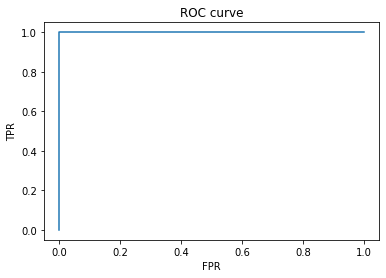

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
fpr,tpr,thr

(array([0., 0., 0., ..., 0., 0., 1.]),
 array([0.00000000e+00, 4.46608012e-05, 6.25251217e-04, ...,
        2.95163235e-01, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 5.00021632e-01, 2.16686009e-05]))

In [ ]:
roc_auc_score(Y_test_pred, Y_proba)

1.0

Imbalanced data so better to go precision recall curve

##PR AUC Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(Y_test_pred, Y_proba)

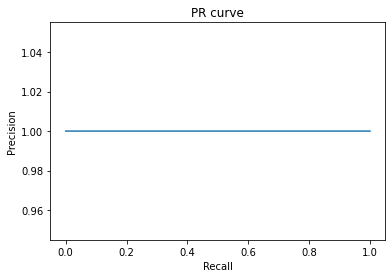

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

1.0

In [ ]:
precision,recall,thr

(array([1., 1., 1., ..., 1., 1., 1.]),
 array([1.00000000e+00, 9.99955339e-01, 9.99910678e-01, ...,
        6.25251217e-04, 4.46608012e-05, 0.00000000e+00]),
 array([0.50002163, 0.50005707, 0.50006513, ..., 1.        , 1.        ,
        1.        ]))

In [ ]:
np.argmax(recall)

0

In [ ]:
Y_proba

array([4.75250500e-01, 3.27059010e-01, 1.72598652e-01, ...,
       5.33580880e-04, 3.75725978e-01, 4.71122846e-04])

In [ ]:
new_Y_pred=np.array([1 if i>=0.64 else 0 for i in Y_proba])
new_Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
(Y_test==new_Y_pred).sum()/Y_test.shape[0]

0.8767409559488767

In [ ]:
f1_score(Y_test,new_Y_pred)

0.6852159198151583

In [ ]:
precision_score(Y_test,new_Y_pred)

0.689050330519013

In [ ]:
recall_score(Y_test,new_Y_pred)

0.6814239482200647

**So by randomly I took threshold value as 0.64 so that the precison, recall are at optimal levels and maximizing the f1 score and accuracy**

##Tradeoff Questions

1. Basically here the precision comes out very less for this model. Saying, sometimes we misclassified fullypaid candidates as charged off candidates

#Actionable Insights and Recommendations

Questionnaire

1. W.r.t entire data 80% of cuustomers have paid the entire loan amount
2. loan amount and installment have higher correlation coefficient of 0.95
3. The majority of people have home ownership as mortgage
4. Yes, People with grades A are more likely to pay their loan.
5. Teacher and manager are the top two afforded job roles.
6. F1 score should be high as we should not lose good customers (precision helps) and we should identify charged off candidates (recall helps) and trade off between actually helps.
7. Precision is very less and recall is slightly high. So, there is chance of losing good customer. But, with recall we almost find real defaulters.
8. loan amount, annual_income, dti, term pub_rec,pub_rec_bankruptcies effects more
9. Yes, from pincodes the areas are quite effecting the loan status.

Insights and Recommendations

1. Recall is high and almost we are identifying the defaulters
2. Precision has come slightly low value which indicates need to fine tuned with some other hyperparameters or changing threshold.
3. Among all the features like emp_title, address,dti, loan amount, interest rate, term, mort_acc, pub_rec and pub_rec_bankruptcies have effect on loan status
4. charged off chances are more for high loan amount and there is signifficant effect of this feature loan amount on target variable
5. Even if interest rates are more there is chances of charged off
6. Installment is more for charged off compared to fully paid
7. annual income for the fully paid is more than charged off people
8. dti is high for charged off compared to fully paid
9. revolving balance is same but revol utilization is more for charged off compared to fully paid
10. Initially the f1 score is around 0.65 (with precision at 0.55, recall at 0.80) but after increasing the threshold f1 score increased to 0.68 (with precision raised to 0.68 and recall reduced to 0.68)



1. In order to reduce false positives (not to lose good customers precision has to go up for this threshold has to be increased further)
2. More data related to applicant dependants income will be helpful
3. data related to eductaion will be helpful
4. Age of the customer will be helpful
5. based on the requiremnent of the bank we should do our model and we have to adjust the threshold to determine and distinguish the classes.